In [ ]:
# WARNING: PATH NAMES TO EXPERIMENTS RESULTS NEED TO BE UPDATED MANUALLY

In [1]:
import pandas as pd
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%ls ../experiments_results/

binary/                    sanity/
binary-major-revision/     shine/
binary_equal_rho/          shine-no-scale/
correlations/              shine-tiny-rho/
major-revision-iome-tuned/ them/
plausible/                 them-no-scale/
plausible-no-scale/        them-tiny-rho/
plausible-tiny-rho/


In [84]:
# Edit me!
case = 'gaussianA' #gaussianA|gaussianB|gaussianC
no_scale = False
draw_empirical_mean = True
compare_to_empirical_mean = False
display_rhos = [1/8, 1., 0.01]#[1/8, 1/2, 1., 0.01]

In [85]:
palette = sns.color_palette("colorblind")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [86]:
# Algorithm names and universal settings
us = 'PLAN'
noscale= 'noscale'
us_noscale = 'PLAN ({noscale})'.format(noscale=noscale)
them = 'IOME'#'Instance optimal'
baseline = 'Empirical mean'#'Empirical mean (non-private)'
us_color = palette[2]
us_noscale_color = palette[4]
them_color = palette[1]
baseline_color = palette[9]

thickness = 2.5

global_font_scale = 2.5
fig_scale = 1. 
figsize = (6*fig_scale, 4.5*fig_scale)
fontsize=36

no_legend = False#True

optional_filename_suffix = ''

display_ratios = [1/4, 1/2, 1.] #[1/4, 1/2, 3/4]

In [87]:
if 'gaussianA' in case:
    xticks = [16, 32, 64, 128, 256, 512, 1024, 2048]
    x = 'd'
    xlabel = '$d$'
    xscale = 'log'
    yscale = 'log'
    
if 'gaussianC' in case:
    xticks = [16, 32, 64, 128, 256, 512, 1024, 2048]
    x = 'd'
    xlabel = '$d$'
    xscale = 'log'
    yscale = 'linear'#'log'
    #optional_filename_suffix = '-compare-to-empirical'
    
if 'gaussianB' in case:
    xticks = [0, 0.5, 1, 1.5, 2]
    x = 'r'
    xlabel = r'$\alpha$'
    xscale = 'linear'
    yscale = 'log'

csv = '../experiments_results/{case}/dataframe{optional}.csv'.format(case=case, optional=optional_filename_suffix)
suffix = ''
if no_scale:
    suffix = '-no-scale'
    
plot_name = '../experiments_results/{case}/{case}{suffix}.pdf'.format(case=case, suffix=suffix)
df = pd.read_csv(csv)


In [88]:
df=df.drop_duplicates() # Defensive!
plot_df = df[['Algorithm', 'd', 'n', 'rho', 'r', 'mean', 'error']]

In [89]:
plot_df = plot_df.replace('PLAN', us)
plot_df = plot_df.replace('PLAN-NOSCALE', us_noscale)
plot_df = plot_df.replace('Instance optimal', them)
plot_df = plot_df.replace('Empirical mean (non-private)', baseline)

plot_df['Algorithm'] = plot_df['Algorithm'] + ' ' + plot_df['rho'].astype(str)

In [90]:
# Filter rhos
plot_df = plot_df[plot_df.rho.isin(display_rhos)]

In [91]:
# Filter no scale/empirical mean
if not no_scale:
    plot_df=plot_df[~plot_df.Algorithm.str.contains(noscale)]


In [92]:
empirical_means_df = plot_df[plot_df.Algorithm.str.contains(baseline)]
empirical_means_df.loc[empirical_means_df.Algorithm.str.contains(baseline), 'Algorithm']=baseline
plot_df=plot_df[~plot_df.Algorithm.str.contains(baseline)]

In [93]:
if compare_to_empirical_mean:

    baseline_df = empirical_means_df.groupby(['d']).mean()
    baseline_df=baseline_df[['error']]
    baseline_df=baseline_df.reset_index(level=0)

    # Subtract the mean value for the estimate of the empirical mean
    for d in plot_df.d.unique():
        plot_df.loc[plot_df.d==d, 'error'] -= baseline_df[baseline_df.d==d]['error'].iloc[0]

    #Absolute value
    plot_df['error'] = plot_df['error'].abs()

In [94]:
pd.options.display.max_rows = 120

In [95]:
plot_df.groupby(['Algorithm', 'd', 'n', 'rho', 'r', 'mean']).describe()

error                                  \
                                    count       mean       std        min   
Algorithm  d   n     rho   r   mean                                         
IOME 0.125 512 10000 0.125 0.0 10    50.0   0.337762  0.011819   0.313630   
                           0.5 10    50.0   0.476329  0.015929   0.443050   
                           1.0 10    50.0   0.976225  0.047190   0.848930   
                           1.5 10    50.0   3.205748  0.210432   2.833117   
                           2.0 10    50.0  13.190433  1.100165  11.768033   
IOME 1.0   512 10000 1.000 0.0 10    50.0   0.243923  0.006267   0.230530   
                           0.5 10    50.0   0.336870  0.015180   0.308712   
                           1.0 10    50.0   0.644181  0.066250   0.542387   
                           1.5 10    50.0   2.023635  0.488360   1.479463   
                           2.0 10    50.0   7.729909  1.685011   5.044420   
PLAN 0.125 512 10000 0.125 0.0 10    50.0   0.368877  0.010526   0.347384   
                           0.5 10    50.0   0.504418  0.017701   0.472323   
                           1.0 10    50.0   0.852938  0.051148   0.776728   
                           1.5 10    50.0   2.052494  0.321849   1.596727   
                           2.0 10    50.0   6.794491  1.970253   3.791832   
PLAN 1.0   512 10000 1.000 0.0 10    50.0   0.246568  0.006888   0.230090   
                           0.5 10    50.0   0.340699  0.013018   0.318796   
                           1.0 10    50.0   0.613628  0.065874   0.510597   
                           1.5 10    50.0   1.728196  0.533946   1.105056   
                           2.0 10    50.0   5.908325  2.073619   2.745690   

                                                                      \
                                           25%        50%        75%   
Algorithm  d   n     rho   r   mean                                    
IOME 0.125 512 10000 0.125 0.0 10     0.330991   0.335819   0.345322   
                           0.5 10     0.461382   0.477096   0.489212   
                           1.0 10     0.951916   0.977591   0.996843   
                           1.5 10     3.059419   3.161234   3.321225   
                           2.0 10    12.479354  12.971439  13.645932   
IOME 1.0   512 10000 1.000 0.0 10     0.240392   0.243365   0.247062   
                           0.5 10     0.323851   0.337239   0.347753   
                           1.0 10     0.591577   0.639227   0.678756   
                           1.5 10     1.746345   1.868895   2.164979   
                           2.0 10     6.257495   7.684370   8.901519   
PLAN 0.125 512 10000 0.125 0.0 10     0.360470   0.369497   0.376944   
                           0.5 10     0.489981   0.503927   0.518490   
                           1.0 10     0.810600   0.847158   0.885935   
                           1.5 10     1.803489   1.943452   2.257461   
                           2.0 10     5.331771   6.255775   7.991163   
PLAN 1.0   512 10000 1.000 0.0 10     0.242359   0.245885   0.251037   
                           0.5 10     0.330807   0.338594   0.348724   
                           1.0 10     0.562777   0.609277   0.639945   
                           1.5 10     1.420874   1.566514   1.929501   
                           2.0 10     4.200052   5.695090   7.186994   

                                                
                                           max  
Algorithm  d   n     rho   r   mean             
IOME 0.125 512 10000 0.125 0.0 10     0.365173  
                           0.5 10     0.504156  
                           1.0 10     1.119991  
                           1.5 10     3.879082  
                           2.0 10    18.227293  
IOME 1.0   512 10000 1.000 0.0 10     0.258571  
                           0.5 10     0.374540  
                           1.0 10     0.832058  
                           1.5 10     3.819414  
                   

In [96]:
get_color = lambda x: them_color if them in x else (us_noscale_color if us_noscale in x else (us_color if us in x else baseline_color))


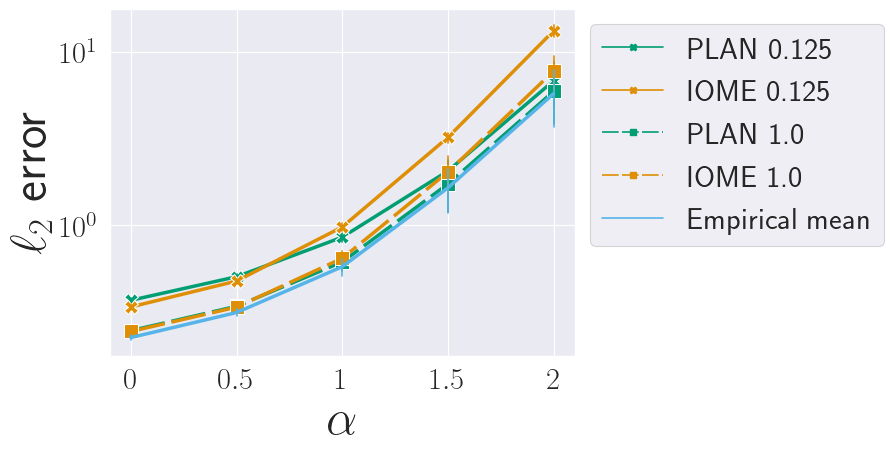

In [97]:
plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_styles = ['X', 's', 'p', 'd', 'h', '.', 'D']
dash_styles = ['', (10, 2), (3, 1.25, 1.5, 1.25)]
marker_map = {}
dash_map = {}
for i, rho in enumerate(plot_df['rho'].astype(str).unique()):
    for label in [label for label in plot_df['Algorithm'].unique() if rho in label]:
        marker_map[label] = marker_styles[i%len(marker_styles)]
        dash_map[label] = dash_styles[i%len(dash_styles)]

g = sns.lineplot(data=plot_df, x=x, y='error', hue='Algorithm', style='Algorithm',
                 markers=marker_map, 
                 dashes=dash_map,
                 errorbar='sd', #Plots error bars at +-1 std
                 err_style='bars',
                 estimator='mean',
                 ms=10,
                 palette={x:get_color(x) for x in plot_df['Algorithm'].unique()},
                 linewidth=thickness,
                )
if draw_empirical_mean:
    sns.lineplot(data=empirical_means_df, x=x, y='error', hue='Algorithm', style='Algorithm',
                     errorbar='sd', #Plots error bars at +-1 std
                     err_style='bars',
                     estimator='mean',
                     ms=10,
                     palette={x:get_color(x) for x in empirical_means_df['Algorithm'].unique()},
                     linewidth=thickness,
                    )

g.legend().set_title(None)
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
if no_legend:
    g.legend().remove()
    
    
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'$\ell_2$ error', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)
g.set_xticks(xticks)
g.set_xticklabels(['$'+str(label)+'$' for label in xticks]) #Retain math formatting when forcing labels

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)

# The binary case

## Real-World Data

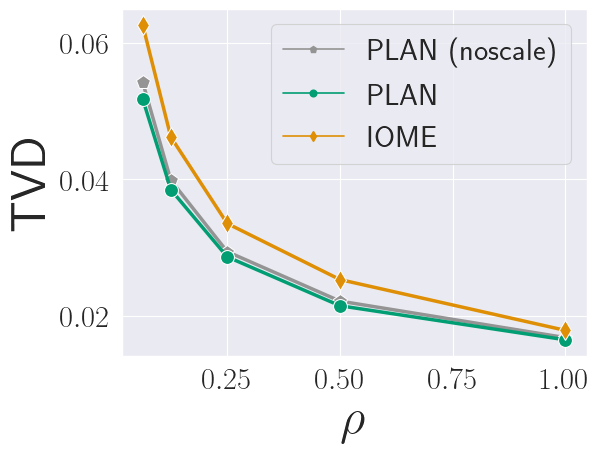

In [68]:
case = 'POS' # kosarak | POS
version = 'binary-major-revision'


csv = '../experiments_results/{version}/{case}/dataframe.csv'.format(version=version, case=case)
plot_name = '../experiments_results/{version}/{case}/{case}.pdf'.format(version=version,case=case)
df = pd.read_csv(csv)
plot_df = df[['label', 'rho', 'error']].groupby(['label', 'rho']).mean().reset_index()
plot_df = plot_df[~plot_df.label.str.contains("unclipped")]
plot_df = plot_df[~plot_df.label.str.contains("oracle")]

plot_df = plot_df.replace('PLAN(paper)-clipped', us)
plot_df = plot_df.replace('PLAN(noscale)-clipped', us_noscale)
plot_df = plot_df.replace('rr', them)
plot_df = plot_df.replace('instance optimal', them)


x = 'rho'
xlabel = '$\\rho$'
xscale = 'linear'
yscale = 'linear' # 'log' | 'linear'

plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
#plt.rc('text', usetex=False)
plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_map = {us:'o', them:'d', us_noscale: 'p'}

g = sns.lineplot(data=plot_df, x=x, y='error', hue="label", style='label', dashes=False, ms=10,
                 palette={us:us_color,them:them_color,us_noscale: us_noscale_color},
                 linewidth=thickness,
                 markers=marker_map,
                )

g.legend().set_title(None)
if no_legend:
    g.legend().remove()
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'TVD', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)

In [69]:
plot_name

'../experiments_results/binary-major-revision/POS/POS.pdf'

# Run time

In [ ]:
version = 'binary-major-revision'


csv = '../experiments_results/{version}/{case}/dataframe.csv'.format(version=version, case=case)
plot_name = '../experiments_results/{version}/{case}/{case}.pdf'.format(version=version,case=case)
df = pd.read_csv(csv)


In [ ]:
plan = 'PLAN(paper)-unclipped'
iome = 'instance optimal'
df[(df.label == iome)].describe()

## Synthetic Data

In [ ]:
case = 'synthetic'
version = 'binary-major-revision'


csv = '../experiments_results/{version}/{case}/dataframe.csv'.format(version=version, case=case)
plot_name = '../experiments_results/{version}/{case}/{case}.pdf'.format(version=version,case=case)
df = pd.read_csv(csv)
plot_df = df[['label', 'd', 'n', 'rho', 'ratio', 'error']].groupby(['label', 'd', 'n', 'rho', 'ratio']).mean().reset_index()

plot_df = plot_df[~plot_df.label.str.contains("unclipped")]
plot_df = plot_df[~plot_df.label.str.contains("oracle")]


x = 'd'
xlabel = '$d$'
xscale = 'linear'
yscale = 'linear' # 'log' | 'linear'
xticks = [256, 512, 1024, 2048]

#alpha = 0.0
rho = 0.5

plot_df = plot_df[(plot_df.rho == rho)]
plot_df = plot_df[plot_df.ratio.isin(display_ratios)]

plot_df['plot_label'] = plot_df['label'].str.replace(", clipped", " ")
plot_df['plot_label'] = plot_df['label'].str.strip()
plot_df['plot_label'] = plot_df['plot_label'].str.replace('instance optimal', them) + ' ' + plot_df['ratio'].astype(str)


plt.rcParams['figure.figsize'] = figsize
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = fontsize

plt.rc('text', usetex=True)

sns.set_theme(style='darkgrid', palette='muted', context='paper', font='sans-serif', font_scale=global_font_scale, color_codes=True)

marker_styles = ['X', 's', 'p', 'd', 'h', '.', 'D']
dash_styles = ['', (10, 2), (3, 1.25, 1.5, 1.25)]
marker_map = {}
dash_map = {}
for i, ratio in enumerate(plot_df['ratio'].astype(str).unique()):
    for label in [label for label in plot_df['plot_label'].unique() if ratio in label]:
        marker_map[label] = marker_styles[i%len(marker_styles)]
        dash_map[label] = dash_styles[i%len(dash_styles)]

g = sns.lineplot(data=plot_df, x=x, y='error', hue='plot_label', style='plot_label', dashes=dash_map, ms=10,
                 markers=marker_map,
                 palette={x:get_color(x) for x in plot_df['plot_label'].unique()},
                 linewidth=thickness,
                )


g.legend().set_title(None)
sns.move_legend(g, 'upper left', bbox_to_anchor=(1, 1))
if no_legend:
    g.legend().remove()
g.set_xscale(xscale)
g.set_yscale(yscale)
g.set_ylabel(r'TVD', fontsize=fontsize)
g.set_xlabel(xlabel, fontsize=fontsize)
g.set_xticks(xticks)

g
g.figure.savefig(plot_name,bbox_inches='tight', pad_inches=0.5)